In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from scipy.ndimage import gaussian_filter
from tqdm.notebook import tqdm
import plotly
import plotly.figure_factory as ff
import numpy as np

In [2]:
import sys
sys.path.append('../')
from utils.datasets import *
from utils.data_augmentation import *

In [3]:
def sum_dicts(dict1, dict2):
    return {k: dict1.get(k, 0) + dict2.get(k, 0) for k in set(dict1) | set(dict2)}

## Dataset pixel values distribution 

In [4]:
def get_dist(vendor, normalization="standardize", data_mod="", verbose=False):
    
    data_augmentation = "none"
    img_size, crop_size = 224, 224 # We will take original image not transformed one
    mask_reshape_method = "padd"
    train_aug, train_aug_img, val_aug = data_augmentation_selector(
        data_augmentation, img_size, crop_size, mask_reshape_method, verbose=verbose
    )
    
    add_depth = False
    batch_size = 100

    dataset = f"mms_vendor{vendor}{data_mod}"

    only_end = False if "full" in dataset else True
    unlabeled = True if "unlabeled" in dataset else False
    c_centre = find_values(dataset, "centre", int)
    c_vendor = find_values(dataset, "vendor", str)


    train_dataset = MMs2DDataset(
        partition="Training", transform=train_aug, img_transform=train_aug_img, 
        normalization=normalization, add_depth=add_depth, 
        is_labeled=(not unlabeled), centre=c_centre, vendor=c_vendor, 
        end_volumes=only_end, data_relative_path="../"
    )

    train_loader = DataLoader(
        train_dataset, batch_size=batch_size, pin_memory=True,
        shuffle=False, collate_fn=train_dataset.custom_collate
    )

    if verbose:
        print(f"Len train_dataset df: {len(train_dataset.data)}")

    total_counts = dict()
    values_list = []
    for batch_indx, batch in enumerate(train_loader):
        for original_img in batch["image"]:
            unique, counts = np.unique(original_img, return_counts=True)
            counts_dict = dict(zip(unique, counts))
            total_counts = sum_dicts(total_counts, counts_dict)
            values_list.extend( list(original_img.cpu().numpy().flatten()) )
            break
        break
    return values_list

In [5]:
%matplotlib inline

In [6]:
save_dir = "data_analysis"
os.makedirs(save_dir, exist_ok=True)

In [7]:
# Set your custom color palette
colors = ['#393E46', '#2BCDC1', '#F66095', '#00523F']
sns.set_palette(sns.color_palette(colors))
#sns.set_palette(sns.color_palette("Paired"))

sns.set_style("whitegrid")
sns.despine()

<Figure size 432x288 with 0 Axes>

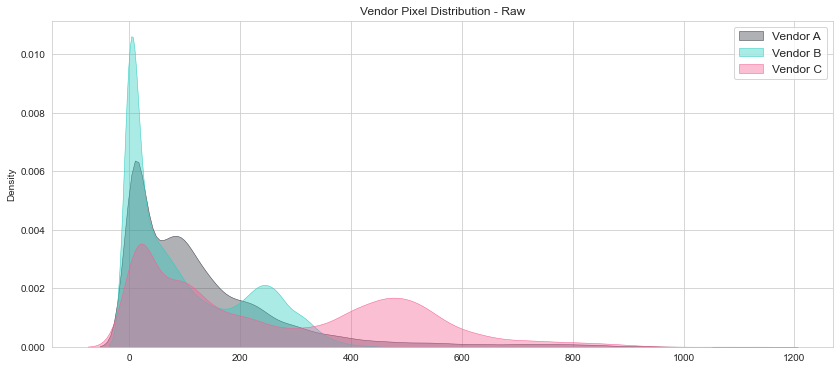

In [8]:
values_list_A = get_dist("A", normalization="none")
values_list_B = get_dist("B", normalization="none")
values_list_C = get_dist("C", normalization="none", data_mod="_unlabeled")

fig, ax = plt.subplots(figsize=(14,6))

sns.kdeplot(values_list_A, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
sns.kdeplot(values_list_B, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
sns.kdeplot(values_list_C, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
#sns.kdeplot(values_list_D, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)

ax.legend(['Vendor A', "Vendor B", "Vendor C"], prop={'size': 12})
plt.title("Vendor Pixel Distribution - Raw")
plt.savefig(
    os.path.join(save_dir, "Vendor Pixel Distribution - Raw.png"), 
    dpi=250
)
plt.show()

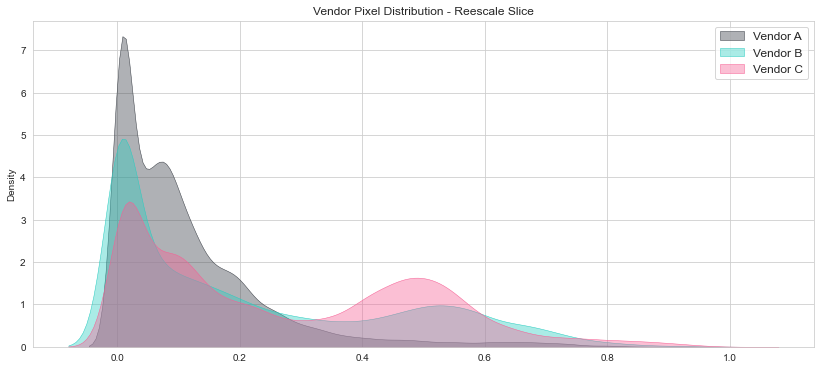

In [9]:
values_list_A = get_dist("A", normalization="reescale")
values_list_B = get_dist("B", normalization="reescale")
values_list_C = get_dist("C", normalization="reescale", data_mod="_unlabeled")

fig, ax = plt.subplots(figsize=(14,6))

sns.kdeplot(values_list_A, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
sns.kdeplot(values_list_B, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
sns.kdeplot(values_list_C, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
#sns.kdeplot(values_list_D, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)

ax.legend(['Vendor A', "Vendor B", "Vendor C"], prop={'size': 12})
plt.title("Vendor Pixel Distribution - Reescale Slice")
plt.savefig(
    os.path.join(save_dir, "Vendor Pixel Distribution - Reescale Slice.png"), 
    dpi=250
)
plt.show()

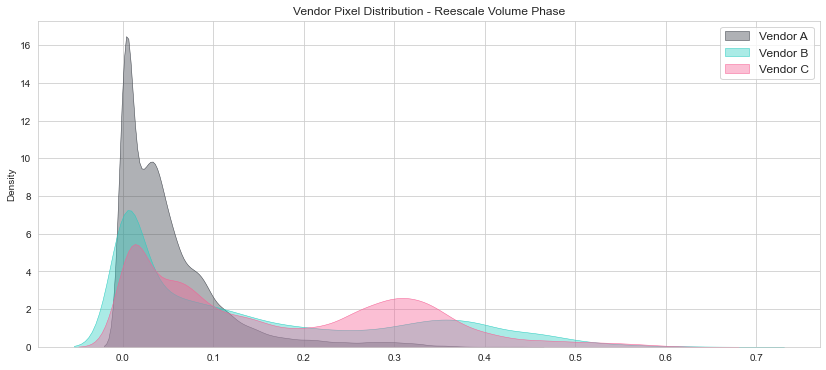

In [10]:
values_list_A = get_dist("A", normalization="reescale_phase")
values_list_B = get_dist("B", normalization="reescale_phase")
values_list_C = get_dist("C", normalization="reescale_phase", data_mod="_unlabeled")

fig, ax = plt.subplots(figsize=(14,6))

sns.kdeplot(values_list_A, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
sns.kdeplot(values_list_B, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
sns.kdeplot(values_list_C, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
#sns.kdeplot(values_list_D, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)

ax.legend(['Vendor A', "Vendor B", "Vendor C"], prop={'size': 12})
plt.title("Vendor Pixel Distribution - Reescale Volume Phase")
plt.savefig(
    os.path.join(save_dir, "Vendor Pixel Distribution - Reescale Volume Phase.png"), 
    dpi=250
)
plt.show()

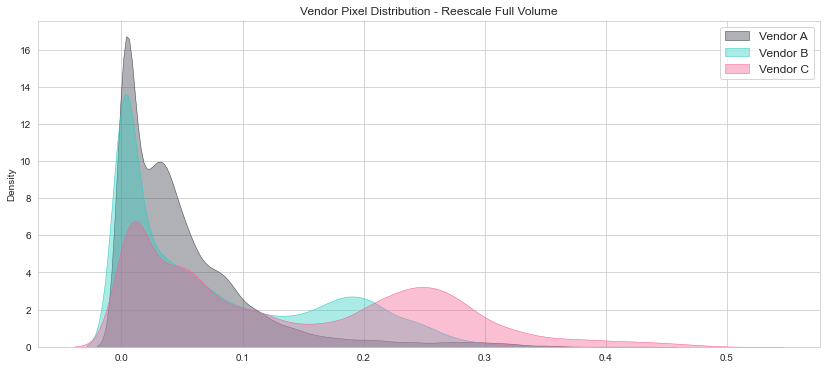

In [11]:
values_list_A = get_dist("A", normalization="reescale_full_vol")
values_list_B = get_dist("B", normalization="reescale_full_vol")
values_list_C = get_dist("C", normalization="reescale_full_vol", data_mod="_unlabeled")

fig, ax = plt.subplots(figsize=(14,6))

sns.kdeplot(values_list_A, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
sns.kdeplot(values_list_B, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
sns.kdeplot(values_list_C, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
#sns.kdeplot(values_list_D, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)

ax.legend(['Vendor A', "Vendor B", "Vendor C"], prop={'size': 12})
plt.title("Vendor Pixel Distribution - Reescale Full Volume")
plt.savefig(
    os.path.join(save_dir, "Vendor Pixel Distribution - Reescale Full Volume.png"), 
    dpi=250
)
plt.show()

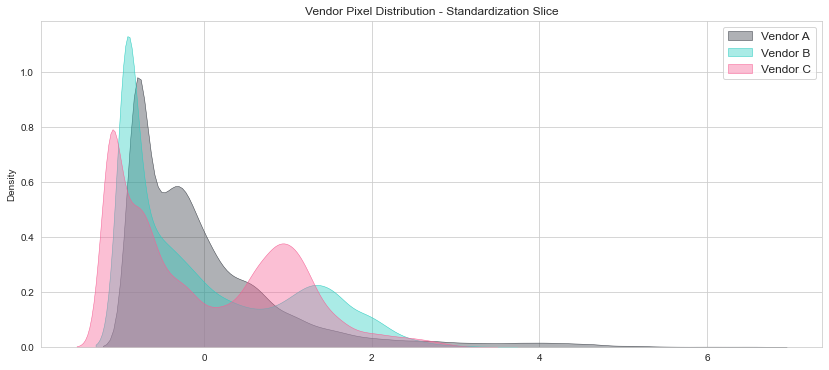

In [12]:
values_list_A = get_dist("A", normalization="standardize")
values_list_B = get_dist("B", normalization="standardize")
values_list_C = get_dist("C", normalization="standardize", data_mod="_unlabeled")

fig, ax = plt.subplots(figsize=(14,6))

sns.kdeplot(values_list_A, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
sns.kdeplot(values_list_B, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
sns.kdeplot(values_list_C, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
#sns.kdeplot(values_list_D, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)

ax.legend(['Vendor A', "Vendor B", "Vendor C"], prop={'size': 12})
plt.title("Vendor Pixel Distribution - Standardization Slice")
plt.savefig(
    os.path.join(save_dir, "Vendor Pixel Distribution - Standardization Slice.png"), 
    dpi=250
)
plt.show()

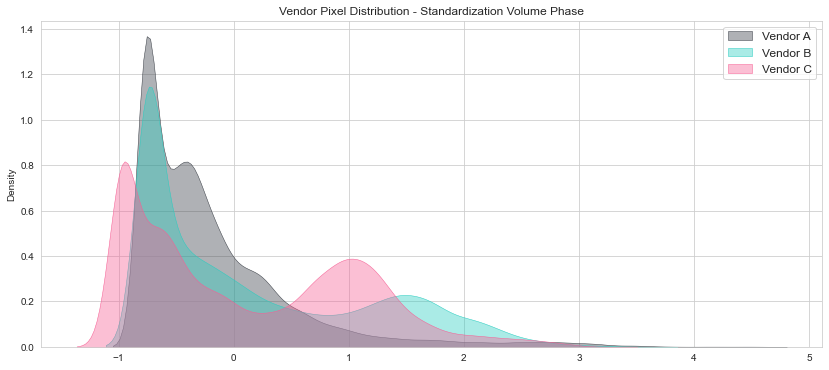

In [13]:
values_list_A = get_dist("A", normalization="standardize_phase")
values_list_B = get_dist("B", normalization="standardize_phase")
values_list_C = get_dist("C", normalization="standardize_phase", data_mod="_unlabeled")

fig, ax = plt.subplots(figsize=(14,6))

sns.kdeplot(values_list_A, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
sns.kdeplot(values_list_B, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
sns.kdeplot(values_list_C, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
#sns.kdeplot(values_list_D, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)

ax.legend(['Vendor A', "Vendor B", "Vendor C"], prop={'size': 12})
plt.title("Vendor Pixel Distribution - Standardization Volume Phase")
plt.savefig(
    os.path.join(save_dir, "Vendor Pixel Distribution - Standardization Volume Phase.png"), 
    dpi=250
)
plt.show()

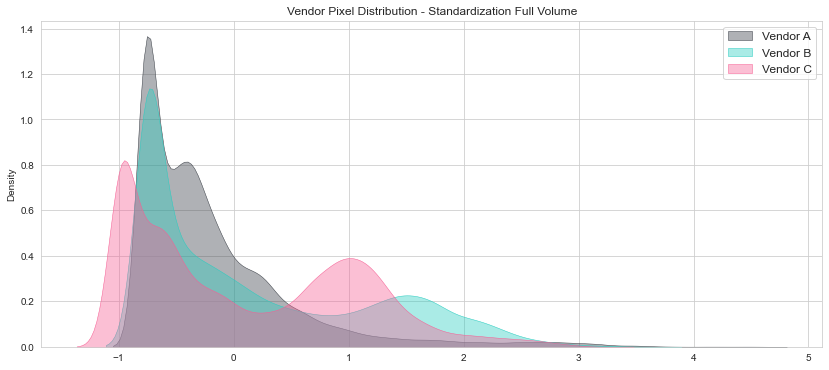

In [14]:
values_list_A = get_dist("A", normalization="standardize_full_vol")
values_list_B = get_dist("B", normalization="standardize_full_vol")
values_list_C = get_dist("C", normalization="standardize_full_vol", data_mod="_unlabeled")

fig, ax = plt.subplots(figsize=(14,6))

sns.kdeplot(values_list_A, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
sns.kdeplot(values_list_B, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
sns.kdeplot(values_list_C, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)
#sns.kdeplot(values_list_D, fill=True, common_norm=False, alpha=.4, linewidth=0.5, ax=ax)

ax.legend(['Vendor A', "Vendor B", "Vendor C"], prop={'size': 12})
plt.title("Vendor Pixel Distribution - Standardization Full Volume")
plt.savefig(
    os.path.join(save_dir, "Vendor Pixel Distribution - Standardization Full Volume.png"), 
    dpi=250
)
plt.show()